# MVP

# MTA data

### Acquiring monthly MTA ridership data of 2019

In [2]:
import pandas as pd

In [3]:
mta_data=pd.read_csv('mta_data_2019.csv')

In [4]:
mta_data.shape

(12499145, 11)

In [5]:
mta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499145 entries, 0 to 12499144
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 1.0+ GB


In [6]:
mta_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/18/2020,03:00:00,RECOVR AUD,7348000,2490989
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/18/2020,07:00:00,RECOVR AUD,7348009,2491000
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/18/2020,11:00:00,REGULAR,7348056,2491089
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/18/2020,15:00:00,REGULAR,7348214,2491154
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/18/2020,19:00:00,REGULAR,7348509,2491203


In [7]:
import datetime

In [8]:
#combine date and time into a new column data_time
mta_data["DATE_TIME"] = pd.to_datetime(mta_data.DATE + " " + mta_data.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [9]:
#only select data from year 2019, and from 12/31/2018 for calculating daily entry gain
mta_data=mta_data[(mta_data['DATE_TIME'].dt.year == 2019) | (mta_data['DATE']=='12/31/2018')]

In [10]:
mta_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
616795,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512,2019-12-28 03:00:00
616796,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523,2019-12-28 07:00:00
616797,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594,2019-12-28 11:00:00
616798,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647,2019-12-28 15:00:00
616799,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713,2019-12-28 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
11495184,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/04/2019,11:36:26,REGULAR,5554,367,2019-01-04 11:36:26
11495185,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/04/2019,11:44:04,REGULAR,5554,367,2019-01-04 11:44:04
11495186,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/04/2019,12:00:00,REGULAR,5554,367,2019-01-04 12:00:00
11495187,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/04/2019,16:00:00,REGULAR,5554,367,2019-01-04 16:00:00


In [11]:
mta_data['MONTH']=mta_data['DATE_TIME'].dt.month

In [12]:
mta_data.dtypes

C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DIVISION             object
DATE                 object
TIME                 object
DESC                 object
ENTRIES               int64
EXITS                 int64
DATE_TIME    datetime64[ns]
MONTH                 int64
dtype: object

In [13]:
# Get rid of the duplicate entry
mta_data.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
mta_data.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [14]:
mta_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,MONTH
823275,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,20:00:00,REGULAR,5554,420,2019-12-31 20:00:00,12
823274,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,16:00:00,REGULAR,5554,420,2019-12-31 16:00:00,12
823273,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,12:00:00,REGULAR,5554,420,2019-12-31 12:00:00,12
823272,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,08:00:00,REGULAR,5554,420,2019-12-31 08:00:00,12
823271,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,04:00:00,REGULAR,5554,420,2019-12-31 04:00:00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11293602,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2018,19:00:00,REGULAR,6891815,2336721,2018-12-31 19:00:00,12
11293601,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2018,15:00:00,REGULAR,6891359,2336675,2018-12-31 15:00:00,12
11293600,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2018,11:00:00,REGULAR,6891018,2336622,2018-12-31 11:00:00,12
11293599,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2018,07:00:00,REGULAR,6890942,2336469,2018-12-31 07:00:00,12


In [15]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(mta_data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-12-31 03:00:00,1
7154792,R139,R031,04-00-00,34 ST-PENN STA,2019-08-20 20:00:00,1
7154774,R139,R031,04-00-00,34 ST-PENN STA,2019-08-17 20:00:00,1
7154775,R139,R031,04-00-00,34 ST-PENN STA,2019-08-18 00:00:00,1
7154776,R139,R031,04-00-00,34 ST-PENN STA,2019-08-18 04:00:00,1


In [16]:
mta_data = mta_data.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [17]:
mta_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,MONTH
823275,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,20:00:00,5554,2019-12-31 20:00:00,12
823274,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,16:00:00,5554,2019-12-31 16:00:00,12
823273,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,12:00:00,5554,2019-12-31 12:00:00,12
823272,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,08:00:00,5554,2019-12-31 08:00:00,12
823271,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,04:00:00,5554,2019-12-31 04:00:00,12


In [37]:
mta_data.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,MONTH
11293602,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2018,19:00:00,6891815,2018-12-31 19:00:00,12
11293601,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2018,15:00:00,6891359,2018-12-31 15:00:00,12
11293600,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2018,11:00:00,6891018,2018-12-31 11:00:00,12
11293599,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2018,07:00:00,6890942,2018-12-31 07:00:00,12
11293598,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2018,03:00:00,6890934,2018-12-31 03:00:00,12


### Match daily max entry with previous day max entry for calculating daily gain

In [38]:
#get daily maximum entries at each turnstile
#groupby automatically sorts grouped columns in ascending order
#since "TIME" is not sorted, it is still in descending order as previously sorted. first() returns the first row of each group
mta_data_daily = (mta_data
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [39]:
mta_data_daily['DATE'] = pd.to_datetime(mta_data_daily['DATE'])

In [40]:
mta_data_daily=mta_data_daily.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE"], ascending=True)

In [45]:
#finding daily gain in entries
mta_data_daily[["PREV_DATE", "PREV_ENTRIES"]] = (mta_data_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))

<ipython-input-45-de1ca14dae5e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_data_daily[["PREV_DATE", "PREV_ENTRIES"]] = (mta_data_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))


In [46]:
mta_data_daily.head(500)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
364,A002,R051,02-00-00,59 ST,2018-12-31,6891946,NaT,NaN
0,A002,R051,02-00-00,59 ST,2019-01-01,6892430,2018-12-31,6891946.0
1,A002,R051,02-00-00,59 ST,2019-01-02,6893894,2019-01-01,6892430.0
2,A002,R051,02-00-00,59 ST,2019-01-03,6895434,2019-01-02,6893894.0
3,A002,R051,02-00-00,59 ST,2019-01-04,6896974,2019-01-03,6895434.0
...,...,...,...,...,...,...,...,...
494,A002,R051,02-00-01,59 ST,2019-05-09,6281688,2019-05-08,6280457.0
495,A002,R051,02-00-01,59 ST,2019-05-10,6282978,2019-05-09,6281688.0
496,A002,R051,02-00-01,59 ST,2019-05-11,6283731,2019-05-10,6282978.0
497,A002,R051,02-00-01,59 ST,2019-05-12,6284201,2019-05-11,6283731.0


In [47]:
# Drop the rows for the earliest date in the df
mta_data_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [48]:
mta_data_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,2019-01-01,6892430,2018-12-31,6891946.0
1,A002,R051,02-00-00,59 ST,2019-01-02,6893894,2019-01-01,6892430.0
2,A002,R051,02-00-00,59 ST,2019-01-03,6895434,2019-01-02,6893894.0
3,A002,R051,02-00-00,59 ST,2019-01-04,6896974,2019-01-03,6895434.0
4,A002,R051,02-00-00,59 ST,2019-01-05,6897740,2019-01-04,6896974.0
...,...,...,...,...,...,...,...,...
1778265,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-12-27,5554,2019-12-26,5554.0
1778266,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-12-28,5554,2019-12-27,5554.0
1778267,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-12-29,5554,2019-12-28,5554.0
1778268,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-12-30,5554,2019-12-29,5554.0


### Clean dirty data

In [49]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 100,000, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
mta_data_daily["DAILY_ENTRIES"] = mta_data_daily.apply(get_daily_counts, axis=1, max_counter=100000)

In [50]:
mta_data_daily[(mta_data_daily.DATE=='2019-01-01')&(mta_data_daily.STATION=='137 ST CITY COL')].head(50)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1263200,R175,R169,01-00-00,137 ST CITY COL,2019-01-01,2795649,2018-12-31,2795398.0,251.0
1263566,R175,R169,01-00-01,137 ST CITY COL,2019-01-01,1953153,2018-12-31,1952908.0,245.0
1263932,R175,R169,01-00-02,137 ST CITY COL,2019-01-01,3913019,2018-12-31,3912775.0,244.0
1264298,R175,R169,01-00-03,137 ST CITY COL,2019-01-01,1061911,2018-12-31,1061689.0,222.0
1264660,R175,R169,01-00-04,137 ST CITY COL,2019-01-01,187359495,2018-12-31,187359294.0,201.0
1265026,R176,R169,00-00-00,137 ST CITY COL,2019-01-01,10738251,2018-12-31,10737830.0,421.0
1265392,R176,R169,00-00-01,137 ST CITY COL,2019-01-01,12656491,2018-12-31,12655398.0,1093.0
1265758,R176,R169,00-00-02,137 ST CITY COL,2019-01-01,16722748,2018-12-31,16721242.0,1506.0
1266124,R176,R169,00-00-03,137 ST CITY COL,2019-01-01,8482538,2018-12-31,8481214.0,1324.0
1266490,R176,R169,00-03-00,137 ST CITY COL,2019-01-01,6148565,2018-12-31,6147728.0,837.0


In [51]:
#getting daily entries for making daily heatmap later
total_daily=mta_data_daily.groupby(["DATE"]).DAILY_ENTRIES.sum().reset_index(name ='DAILY_ENTRIES')

In [52]:
total_daily

,DATE,DAILY_ENTRIES
0,2019-01-01,2381036.0
1,2019-01-02,5313508.0
2,2019-01-03,5708684.0
3,2019-01-04,5580026.0
4,2019-01-05,2880013.0
...,...,...
360,2019-12-27,4533088.0
361,2019-12-28,3440375.0
362,2019-12-29,2721517.0
363,2019-12-30,4542705.0


In [35]:
import seaborn as sns

<AxesSubplot:xlabel='DATE', ylabel='DAILY_ENTRIES'>

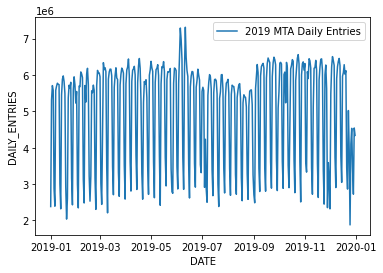

In [53]:
#sanity check
sns.lineplot(data=total_daily,
             x = 'DATE',
             y = 'DAILY_ENTRIES',
             label = '2019 MTA Daily Entries',
            )

In [672]:
total_daily.to_csv('mta_2019_daily.csv', sep='\t',index=False)

### Sum turnstile entries of each station

In [1]:
station_daily = mta_data_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

NameError: name 'mta_data_daily' is not defined

In [201]:
station_daily["MONTH"] = pd.to_datetime(station_daily['DATE']).dt.strftime('%Y-%m')

In [202]:
station_daily

,STATION,DATE,DAILY_ENTRIES,MONTH
0,1 AV,2019-01-01,9989.0,2019-01
1,1 AV,2019-01-02,18476.0,2019-01
2,1 AV,2019-01-03,19866.0,2019-01
3,1 AV,2019-01-04,20389.0,2019-01
4,1 AV,2019-01-05,13930.0,2019-01
...,...,...,...,...
137707,ZEREGA AV,2019-12-27,2155.0,2019-12
137708,ZEREGA AV,2019-12-28,1223.0,2019-12
137709,ZEREGA AV,2019-12-29,1003.0,2019-12
137710,ZEREGA AV,2019-12-30,1865.0,2019-12


In [225]:
station_monthly=station_daily.groupby(["STATION", "MONTH"]).DAILY_ENTRIES.sum().reset_index(name ='MONTHLY_ENTRIES')

In [226]:
total_monthly=station_daily.groupby(["MONTH"]).DAILY_ENTRIES.sum().reset_index(name ='MONTHLY_ENTRIES')

In [227]:
total_monthly

,MONTH,MONTHLY_ENTRIES
0,2019-01,144898903.0
1,2019-02,135578108.0
2,2019-03,154699034.0
3,2019-04,156225057.0
4,2019-05,162395331.0
5,2019-06,156576065.0
6,2019-07,149801396.0
7,2019-08,147829086.0
8,2019-09,153551953.0
9,2019-10,165768864.0


In [217]:
#write 2019's monthly MTA data to .csv
total_monthly.to_csv('mta_2019_monthly.csv', sep='\t', index=True)

In [222]:
#test=pd.read_csv('mta_2019_monthly.csv', sep='\t', index_col=0)

### Visualize 2019's MTA data

In [169]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

In [343]:
total_monthly.head()

,MONTH,MONTHLY_ENTRIES
0,2019-01,144898903.0
1,2019-02,135578108.0
2,2019-03,154699034.0
3,2019-04,156225057.0
4,2019-05,162395331.0


(-1.0, 13.0, 0.0, 200000000.0)

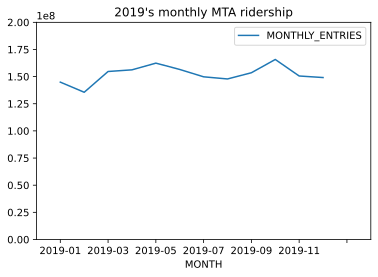

In [240]:
#2019's monthly MTA ridership w/ matplotlib
total_monthly.plot(x="MONTH", y="MONTHLY_ENTRIES")
plt.title('2019\'s monthly MTA ridership')
plt.axis([-1, 13, 0, 200000000])

In [342]:
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
#2019's monthly MTA ridership w/ seaborn
plt.figure( figsize = (15, 10))

#https://learndataanalysis.org/source-code-format-axis-label-to-thousands-and-millions-suffix-matplotlib-tutorial/
#https://stackoverflow.com/questions/61330427/set-y-axis-in-millions
#Format Axis Label To Thousands and Millions Suffix
def millions_formatter(x, pos):
    return f'{x / 1000000}M'

sns.set_style("whitegrid") # add gridlines
fig=sns.lineplot(data=total_monthly, x="MONTH", y="MONTHLY_ENTRIES", color='darkgoldenrod')
fig.xaxis.grid(False) #remove vertical gridlines
plt.axis([-1, 12, 0, 200000000])
x_ticks = np.arange(0, 12, step=3)
x_ticks_wDecmeber = np.append(x_ticks,11) #include december in x axis
#x_ticks = np.array([0, 3, 6, 9,11])
plt.xticks(x_ticks_wDecmeber,rotation=0)
plt.xlabel("Month")
plt.ylabel("Entries per month")
plt.title('MTA Data')
fig.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

sns.set(font_scale = 2)

fig.figure.savefig("MVP_MTA.png")


NameError: name 'plt' is not defined

In [472]:
np.arange(0, 12, step=3)

array([0, 3, 6, 9])

In [345]:
station_monthly.head()

,STATION,MONTH,MONTHLY_ENTRIES
0,1 AV,2019-01,554817.0
1,1 AV,2019-02,370328.0
2,1 AV,2019-03,470764.0
3,1 AV,2019-04,522903.0
4,1 AV,2019-05,474070.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

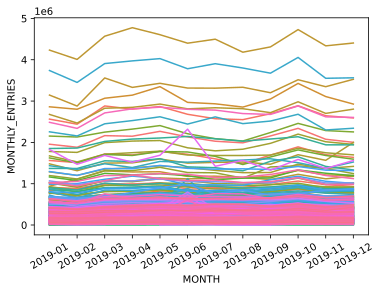

In [355]:
#MTA entries by station
sns.lineplot(data=station_monthly, x="MONTH", y="MONTHLY_ENTRIES", hue='STATION',legend=False)
plt.xticks(rotation=30)

# Uber/Lyft data

In [414]:
#https://data.cityofnewyork.us/Transportation/FHV-Base-Aggregate-Report/2v9c-2k7f
uberlyft_data=pd.read_csv('UberLyftData.csv')

In [415]:
uberlyft_data=uberlyft_data[uberlyft_data['Base Name'].isin(['UBER','LYFT'])]

In [416]:
uberlyft_data

,Base License Number,Base Name,DBA,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
357,LYFT,LYFT,LYFT,2017,12,December,"3,031,881","573,577","35,077"
524,UBER,UBER,UBER,2020,10,October,"9,797,775",0,"43,848"
734,UBER,UBER,UBER,2017,1,January,"7,736,951",0,"48,451"
1455,UBER,UBER,UBER,2020,1,January,"14,582,520","1,047,433","70,090"
1659,UBER,UBER,UBER,2018,12,December,"14,999,895","3,802,083","78,093"
...,...,...,...,...,...,...,...,...,...
38954,UBER,UBER,UBER,2018,11,November,"14,554,993","3,858,407","76,494"
39487,UBER,UBER,UBER,2016,12,December,"7,880,513",0,"46,886"
39491,UBER,UBER,UBER,2017,10,October,"10,135,304","1,585,613","61,613"
39632,UBER,UBER,UBER,2021,2,February,"8,290,758",0,"39,322"


In [417]:
uberlyft_data.dtypes

Base License Number              object
Base Name                        object
DBA                              object
Year                              int64
Month                             int64
Month Name                       object
Total Dispatched Trips           object
Total Dispatched Shared Trips    object
Unique Dispatched Vehicles       object
dtype: object

In [418]:
#remove comma in number
uberlyft_data['Total Dispatched Trips']=uberlyft_data['Total Dispatched Trips'].str.replace(',', '').astype(np.int64)

In [419]:
uberlyft_data['MONTH'] = uberlyft_data.Year.astype(str) + '-' + uberlyft_data.Month.astype(str)

In [420]:
#convert date to yyyy-mm format
uberlyft_data["MONTH"] = pd.to_datetime(uberlyft_data['MONTH']).dt.strftime('%Y-%m')

In [323]:
#uberlyft_data=pd.pivot_table(uberlyft_data,index=["MONTH"],columns=["Base Name"],values=["Total Dispatched Trips"])['Total Dispatched Trips']

In [410]:
#uberlyft_data=uberlyft_data.reset_index()

In [424]:
uberlyft_data=uberlyft_data.sort_values(["MONTH"], ascending=True)

In [425]:
uberlyft_data

,Base License Number,Base Name,DBA,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles,MONTH
8548,UBER,UBER,UBER,2015,1,January,1871075,0,"12,544",2015-01
31569,UBER,UBER,UBER,2015,2,February,2178305,0,"13,531",2015-02
32596,UBER,UBER,UBER,2015,3,March,2259575,0,"14,290",2015-03
1934,UBER,UBER,UBER,2015,4,April,2280332,0,"14,952",2015-04
2104,LYFT,LYFT,LYFT,2015,4,April,80613,0,"2,519",2015-04
...,...,...,...,...,...,...,...,...,...,...
39809,UBER,UBER,UBER,2021,8,August,10196747,0,"51,083",2021-08
17515,LYFT,LYFT,LYFT,2021,9,September,4237878,0,"43,029",2021-09
15840,UBER,UBER,UBER,2021,9,September,10557442,0,"56,492",2021-09
32957,LYFT,LYFT,LYFT,2021,10,October,4427527,0,"45,385",2021-10


### Plot Monthly Uber/Lyft data

In [448]:
from matplotlib.ticker import FuncFormatter

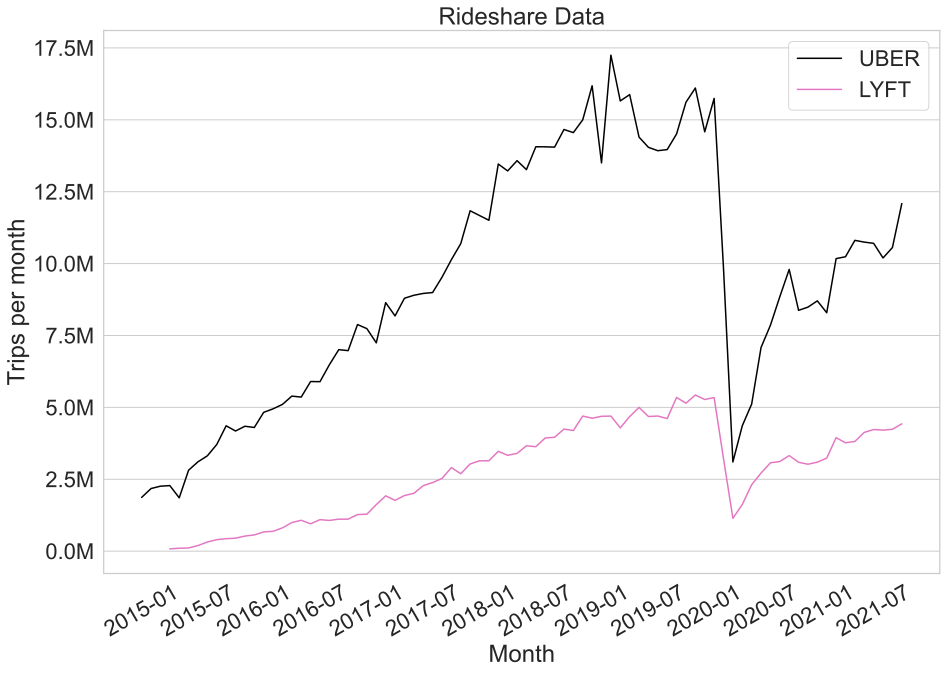

In [662]:
#https://learndataanalysis.org/source-code-format-axis-label-to-thousands-and-millions-suffix-matplotlib-tutorial/
#https://stackoverflow.com/questions/61330427/set-y-axis-in-millions
#Format Axis Label To Thousands and Millions Suffix
plt.figure( figsize = (15, 10))

def millions_formatter(x, pos):
    return f'{x / 1000000}M'

sns.set_style("whitegrid")
fig=sns.lineplot(data=uberlyft_data, x='MONTH', y='Total Dispatched Trips', hue="Base Name",
             palette={'LYFT':'tab:pink','UBER':'black'}, linestyle=None)
fig.xaxis.grid(False)
x_ticks = np.arange(0, 90, 6)
plt.xticks(x_ticks,rotation=30)
plt.xlabel("Month")
plt.ylabel("Trips per month")
#plt.tight_layout()
plt.legend(labels=["UBER","LYFT"], title = "")
plt.title('Rideshare Data')
fig.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
#plt.ticklabel_format(style='plain', axis='y')

sns.set(font_scale = 2)

fig.figure.savefig("MVP_rideshare.png")

### NYC COVID data
data from https://github.com/nytimes/covid-19-data

In [498]:
COVID_data=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [502]:
NYC_COVID_Data=COVID_data[COVID_data.county=='New York City']

In [503]:
NYC_COVID_Data

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
518,2020-03-04,New York City,New York,NaN,2,0.0
565,2020-03-05,New York City,New York,NaN,4,0.0
...,...,...,...,...,...,...
2104502,2022-01-11,New York City,New York,NaN,1978014,36089.0
2107753,2022-01-12,New York City,New York,NaN,2005338,36224.0
2111005,2022-01-13,New York City,New York,NaN,2038543,36374.0
2114257,2022-01-14,New York City,New York,NaN,2058308,36509.0


In [512]:
NYC_COVID_Data[['previous_date','previous_cases']]=NYC_COVID_Data[['date','cases']].shift(1)
#mta_data_daily[["PREV_DATE", "PREV_ENTRIES"]] = (mta_data.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))

C:\Users\Josh_Wang\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [513]:
NYC_COVID_Data

,date,county,state,fips,cases,deaths,previous_date,previous_cases
416,2020-03-01,New York City,New York,NaN,1,0.0,NaN,NaN
448,2020-03-02,New York City,New York,NaN,1,0.0,2020-03-01,1.0
482,2020-03-03,New York City,New York,NaN,2,0.0,2020-03-02,1.0
518,2020-03-04,New York City,New York,NaN,2,0.0,2020-03-03,2.0
565,2020-03-05,New York City,New York,NaN,4,0.0,2020-03-04,2.0
...,...,...,...,...,...,...,...,...
2104502,2022-01-11,New York City,New York,NaN,1978014,36089.0,2022-01-10,1949382.0
2107753,2022-01-12,New York City,New York,NaN,2005338,36224.0,2022-01-11,1978014.0
2111005,2022-01-13,New York City,New York,NaN,2038543,36374.0,2022-01-12,2005338.0
2114257,2022-01-14,New York City,New York,NaN,2058308,36509.0,2022-01-13,2038543.0


In [514]:
#subsetting df
NYC_COVID_Data=NYC_COVID_Data[['date','cases','previous_date','previous_cases']]

In [518]:
#checking presence of NaN
NYC_COVID_Data.isna().any(axis=1)

416         True
448        False
482        False
518        False
565        False
           ...  
2104502    False
2107753    False
2111005    False
2114257    False
2117508    False
Length: 686, dtype: bool

In [520]:
#replace NaN with zero
NYC_COVID_Data.fillna(0)

C:\Users\Josh_Wang\anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [525]:
NYC_COVID_Data['daily_cases']=NYC_COVID_Data.cases-NYC_COVID_Data.previous_cases

<ipython-input-525-8811400d892b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYC_COVID_Data['daily_cases']=NYC_COVID_Data.cases-NYC_COVID_Data.previous_cases


In [541]:
NYC_COVID_Data['date'] = pd.to_datetime(NYC_COVID_Data['date'])

<ipython-input-541-d57b54f53e8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYC_COVID_Data['date'] = pd.to_datetime(NYC_COVID_Data['date'])


In [559]:
NYC_COVID_Data['abbrev_date']=NYC_COVID_Data['date'].dt.month_name().str[:3]+' '+NYC_COVID_Data['date'].dt.day.astype(str)

<ipython-input-559-ffd739536c36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYC_COVID_Data['abbrev_date']=NYC_COVID_Data['date'].dt.month_name().str[:3]+' '+NYC_COVID_Data['date'].dt.day.astype(str)


In [629]:
NYC_COVID_Data['rolling_daily_cases']=NYC_COVID_Data.daily_cases.rolling(7).mean()

<ipython-input-629-34808aa0b23a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYC_COVID_Data['rolling_daily_cases']=NYC_COVID_Data.daily_cases.rolling(7).mean()


In [632]:
NYC_COVID_Data.head()

,date,cases,previous_date,previous_cases,daily_cases,abbrev_date,rolling_daily_cases
416,2020-03-01,1,0,0.0,1.0,Mar 1,NaN
448,2020-03-02,1,2020-03-01,1.0,0.0,Mar 2,NaN
482,2020-03-03,2,2020-03-02,1.0,1.0,Mar 3,NaN
518,2020-03-04,2,2020-03-03,2.0,0.0,Mar 4,NaN
565,2020-03-05,4,2020-03-04,2.0,2.0,Mar 5,NaN


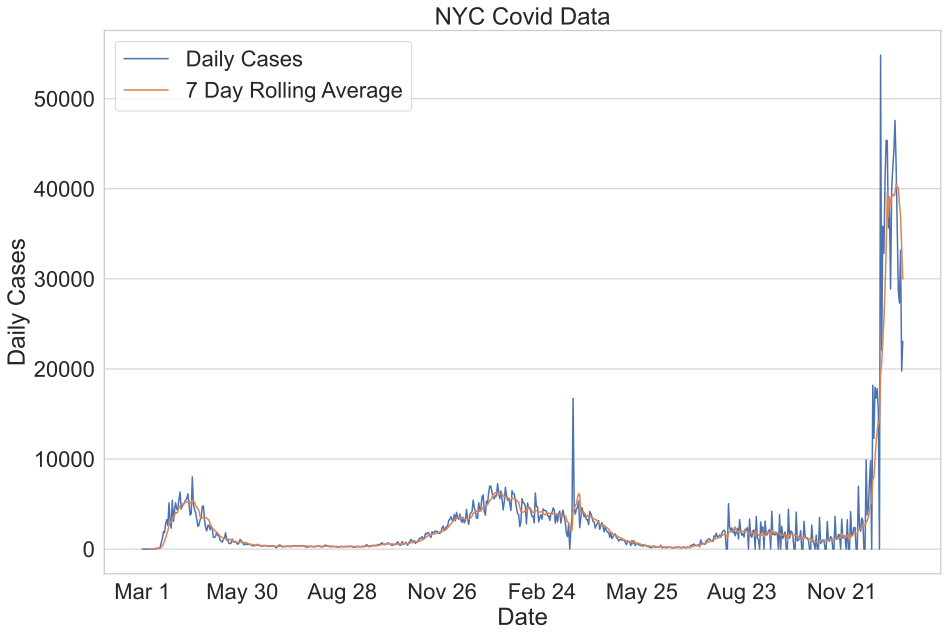

In [656]:
#Plotting NYC covid data
plt.figure( figsize = (15, 10))


xticks=NYC_COVID_Data.date[::100]
xlabels=NYC_COVID_Data.abbrev_date[::100]

sns.set_style("whitegrid")
fig1=sns.lineplot(data=NYC_COVID_Data, 
                  x='date', 
                  y='daily_cases', 
                 #hue="Base Name",
                 #palette={'LYFT':'tab:pink','UBER':'black'},
                  label = 'Daily Cases'
                 )
sns.lineplot(data=NYC_COVID_Data,
             x = 'date',
             y = 'rolling_daily_cases',
             label = '7 Day Rolling Average')

fig1.xaxis.grid(False)
xticks=NYC_COVID_Data.date[::90] #only show tick for every 90 days
xlabels=NYC_COVID_Data.abbrev_date[::90] #only show tick for every 90 days
plt.xticks(xticks,xlabels,rotation=0) #only show tick for every 90 days
plt.xlabel("Date"
           #, fontsize = 20
          )
plt.ylabel("Daily Cases"
           #, fontsize = 20
          )
#plt.tight_layout()
#plt.legend(fontsize = 20)
plt.title("NYC Covid Data"
          #, fontsize = 30
         )
#fig.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
sns.set(font_scale = 2)

fig1.figure.savefig("MVP_covid.png")

# 